---------------------------------------------------------------------------------------------------------------------------------------

## Latar Belakang Masalah

###### Setiap category terdapat product-product yang persentase terjual nya masih dibawah rata-rata persentase penjualan per category nya


## Tujuan EDA

###### Mengetahui pengaruh diskon dan harga diskon terhadap persentase penjualan produk per category
###### Meningkatkan persentase penjualan product terutama untuk produk dengan persentase penjualan di bawah rata-rata per category

---------------------------------------------------------------------------------------------------------------------------------------

# Import Package

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

---------------------------------------------------------------------------------------------------------------------------------------

# Import Data

In [2]:
data = pd.read_csv('ecommerce.csv')
df = pd.DataFrame(data)
dfs = df.copy() # Data sintetis
dfs.head()

,Unnamed: 0,category,product,Original_price,price,perc_of_unit_sold,rating,shpping_rate,gender
0,0,Athletic Shoes,Nike SB Check Solar Cnvs Skateboarding Shoes f...,299.0,211.48,94.0,100.0,FREE Shipping,men
1,1,Athletic Shoes,Nike Md Runner 2 Two-Tone Textile-Mesh Suede-A...,349.0,289.99,80.0,88.0,FREE Shipping,men
2,2,Athletic Shoes,"Nike air Heights Sneaker for Women , Size 38 E...",419.0,337.48,77.0,NaN,FREE Shipping,women
3,3,Athletic Shoes,"Nike Fitness Shoes For Men , 43 EU , Black",319.0,211.48,76.0,80.0,FREE Shipping,men
4,4,Athletic Shoes,"adidas ASWEERUN Sneaker for Mens, Grey - Size ...",259.0,194.99,94.0,NaN,Eligible for FREE Shipping,men


---------------------------------------------------------------------------------------------------------------------------------------

# Describe Data

### Variabel

- Unnamed : urutan nomer produk per category
- Category : Kelompok produk
- Product : Nama Produk
- Original Price : Harga produk sebelum didiskon
- Price : Harga setelah diskon
- perc_of_unit_sold : Persentase penjualan produk
- Shipping rate : tingkat pengiriman produk
- Rating : Angka penilaian produk (1-10)
- gender : jenis kelamin pembeli

#### (Hipotesis) Feature-feature yang saling berhubungan dengan target (perc_of_unit_sold)

1. Category
2. Product
3. Original price
4. price
5. Shipping rate

In [3]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609 entries, 0 to 608
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         609 non-null    int64  
 1   category           609 non-null    object 
 2   product            609 non-null    object 
 3   Original_price     583 non-null    float64
 4   price              609 non-null    float64
 5   perc_of_unit_sold  522 non-null    float64
 6   rating             427 non-null    float64
 7   shpping_rate       567 non-null    object 
 8   gender             581 non-null    object 
dtypes: float64(4), int64(1), object(4)
memory usage: 42.9+ KB


- Terdapat 609 data penjualan

In [4]:
# dfs = dfs.drop(columns='Unnamed: 0')
# dfs['index'] = np.arange(0, 609)
# dfs = dfs.set_index('index') # Set kolom index jadi index data frame
dfs = dfs.rename(columns={"Original_price":"Harga asli", "price":"Harga diskon", "perc_of_unit_sold":"% penjualan", "shpping_rate":"shipping"}) # Rename Kolom agar lebih mudah akses
dfs.head()

,Unnamed: 0,category,product,Harga asli,Harga diskon,% penjualan,rating,shipping,gender
0,0,Athletic Shoes,Nike SB Check Solar Cnvs Skateboarding Shoes f...,299.0,211.48,94.0,100.0,FREE Shipping,men
1,1,Athletic Shoes,Nike Md Runner 2 Two-Tone Textile-Mesh Suede-A...,349.0,289.99,80.0,88.0,FREE Shipping,men
2,2,Athletic Shoes,"Nike air Heights Sneaker for Women , Size 38 E...",419.0,337.48,77.0,NaN,FREE Shipping,women
3,3,Athletic Shoes,"Nike Fitness Shoes For Men , 43 EU , Black",319.0,211.48,76.0,80.0,FREE Shipping,men
4,4,Athletic Shoes,"adidas ASWEERUN Sneaker for Mens, Grey - Size ...",259.0,194.99,94.0,NaN,Eligible for FREE Shipping,men


In [5]:
dfs.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,609.0,60.072250,47.287663,0.0,21.00,46.00,92.00,179.0
Harga asli,583.0,864.498113,1803.365527,42.0,273.00,499.00,980.00,29970.0
Harga diskon,609.0,339.434039,285.416406,21.4,140.98,262.49,444.99,3220.0
% penjualan,522.0,57.678161,25.434947,2.0,36.25,60.00,79.00,99.0
rating,427.0,87.807963,11.422350,20.0,82.00,88.00,96.00,100.0


In [6]:
dfs.describe(include='O').T

,count,unique,top,freq
category,609,7,Watches,180
product,609,602,Lacoste Casual Shoe for Men Size 44 EU - White,3
shipping,567,2,FREE Shipping,356
gender,581,3,men,338


In [7]:
a = dfs[dfs['product']=='Lacoste Casual Shoe for Men Size 44 EU - White']
b = dfs[dfs['product']=='Lacoste Casual Shoe For Men Size 45 EU - White']
c = dfs[dfs['product']=='Polaroid Sunglasses for Unisex , Blue']
d = dfs[dfs['product']=='Hugo Boss Casual Round Watch for Men']
e = dfs[dfs['product']=='Lacoste Casual Shoe for Men Size 42 EU - Black']
f = dfs[dfs['product']=='Lacoste Casual Shoe for Men Size 44 EU - Navy']
dfproduksama = pd.concat([a,b,c,d,e,f])
dfproduksama

,Unnamed: 0,category,product,Harga asli,Harga diskon,% penjualan,rating,shipping,gender
122,27,Casual & Dress Shoes,Lacoste Casual Shoe for Men Size 44 EU - White,359.0,254.49,83.0,100.0,FREE Shipping,men
134,39,Casual & Dress Shoes,Lacoste Casual Shoe for Men Size 44 EU - White,469.0,333.98,50.0,NaN,FREE Shipping,men
136,41,Casual & Dress Shoes,Lacoste Casual Shoe for Men Size 44 EU - White,499.0,349.99,NaN,NaN,FREE Shipping,men
95,0,Casual & Dress Shoes,Lacoste Casual Shoe For Men Size 45 EU - White,519.0,295.98,14.0,NaN,FREE Shipping,men
121,26,Casual & Dress Shoes,Lacoste Casual Shoe For Men Size 45 EU - White,449.0,258.49,NaN,NaN,FREE Shipping,men
149,7,Eyewear,"Polaroid Sunglasses for Unisex , Blue",250.0,180.48,46.0,NaN,Eligible for FREE Shipping,Unisex
244,102,Eyewear,"Polaroid Sunglasses for Unisex , Blue",250.0,149.98,85.0,NaN,Eligible for FREE Shipping,Unisex
451,22,Watches,Hugo Boss Casual Round Watch for Men,1285.0,407.99,3.0,NaN,FREE Shipping,men
481,52,Watches,Hugo Boss Casual Round Watch for Men,1285.0,412.48,9.0,NaN,FREE Shipping,men
99,4,Casual & Dress Shoes,Lacoste Casual Shoe for Men Size 42 EU - Black,539.0,309.98,87.0,100.0,FREE Shipping,men


- Terdapat beberapa produk yang sama memiliki frequensi lebih dari 1, akan tetapi harga asli dan harga diskon nya berbeda. Hal ini mungkin menunjukan bahwa produk tersebut berasal dari ecommerce yang berbeda atau pada waktu penjualan yang berbeda

---------------------------------------------------------------------------------------------------------------------------------------

## Unique setiap kolom

In [8]:
dfs['category'].unique().tolist()

['Athletic Shoes',
 'Casual & Dress Shoes',
 'Eyewear',
 'Perfumes & Fragrances',
 'Sportswear',
 'Wallets',
 'Watches']

In [9]:
# dfs['product'].unique().tolist() # TIDAK DI TAMPILKAN KARENA 602 unique itu terlalu banyak untuk di show

In [10]:
dfs['shipping'].unique().tolist()

['FREE Shipping', 'Eligible for FREE Shipping', nan]

In [11]:
dfs['gender'].unique().tolist()

['men', 'women', nan, 'Unisex']

---------------------------------------------------------------------------------------------------------------------------------------

# Cek Missing Value

In [12]:
dfs.isnull().sum()

Unnamed: 0        0
category          0
product           0
Harga asli       26
Harga diskon      0
% penjualan      87
rating          182
shipping         42
gender           28
dtype: int64

## Missing Value in percent

In [13]:
(dfs.isnull().sum())/ len(dfs.index) * 100

Unnamed: 0       0.000000
category         0.000000
product          0.000000
Harga asli       4.269294
Harga diskon     0.000000
% penjualan     14.285714
rating          29.885057
shipping         6.896552
gender           4.597701
dtype: float64

## Gambaran data missing value

In [14]:
dfnan = dfs[dfs.isna().any(axis=1)]
dfnan.tail(5)

,Unnamed: 0,category,product,Harga asli,Harga diskon,% penjualan,rating,shipping,gender
572,143,Watches,Olivia Burton Marble Florals Dial Watch for Wo...,805.0,276.49,40.0,NaN,FREE Shipping,women
574,145,Watches,Lacoste Casual Watch For Women Analog Silicone...,895.0,388.00,40.0,NaN,FREE Shipping,women
578,149,Watches,Akribos XXIV Men's Classic Bubble Crystal 3 In...,NaN,260.48,93.0,94.0,FREE Shipping,men
597,168,Watches,Scuderia Ferrari Men's Grey Dial Color Rubber...,1045.0,543.98,31.0,NaN,FREE Shipping,men
608,179,Watches,Tissot Dress Watch For Women Analog Stainless ...,1740.0,960.49,20.0,NaN,FREE Shipping,women


---------------------------------------------------------------------------------------------------------------------------------------

# Handling Missing Value

## 1. Target (% penjualan)

Untuk kolom target, nan value langsung di drop karena persentase null nya hanya 14% dari 609 data (85 data)

In [15]:
dfs = dfs[dfs['% penjualan'].notna()]
dfs.isnull().sum()

Unnamed: 0        0
category          0
product           0
Harga asli       14
Harga diskon      0
% penjualan       0
rating          135
shipping         15
gender           22
dtype: int64

## 2. Harga Asli

Untuk handling nan Harga asli, dimana harga asli berkaitan erat dengan category product dan harga diskon, maka nan Harga asli akan difillna dengan cara menambahkan harga diskon dengan median diskon sesuai category product. Digunakan median karena terdapat outlier pada persebaran data feature diskon dan Harga diskon.

In [16]:
dfs['Diskon'] = dfs['Harga asli'] - dfs['Harga diskon']

##### - Persebaran data diskon dfs

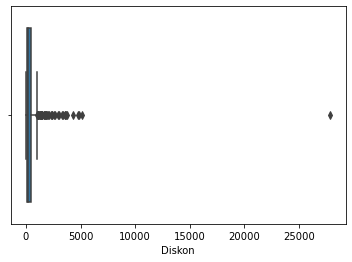

In [17]:
sns.boxplot(x=dfs['Diskon'])

In [18]:
dfsdiskon = dfs.groupby(['category'])['Diskon'].median()
dfsdiskon

category
Athletic Shoes            96.010
Casual & Dress Shoes     187.010
Eyewear                  391.260
Perfumes & Fragrances    183.430
Sportswear                58.520
Wallets                   81.510
Watches                  507.005
Name: Diskon, dtype: float64

- Category Athletic fillna Harga asli

In [19]:
# dfs['Harga asli'][(dfs['category']== 'Athletic Shoes') & (dfs['Harga asli'].isna())] = dfs['Harga asli'][(dfs['category']== 'Athletic Shoes') & (dfs['Harga asli'].isna())].fillna(dfs['Athletic Shoes']+dfsdiskon['Athletic Shoes'])

In [20]:
# dfs['Diskon'][(dfs['category']== 'Athletic Shoes') & (dfs['Harga asli'].isna())] = dfs['Diskon'][(dfs['category']== 'Athletic Shoes') & (dfs['Harga asli'].isna())].fillna(dfsdiskon['Athletic Shoes'])

- Category Perfumes & Fragrances Harga asli

In [21]:
# dfs['Harga asli'][(dfs['category']== 'Perfumes & Fragrances') & (dfs['Harga asli'].isna())] = dfs['Harga asli'][(dfs['category']== 'Perfumes & Fragrances') & (dfs['Harga asli'].isna())].fillna(dfshargadiskon['Perfumes & Fragrances']+dfsdiskon['Perfumes & Fragrances'])

In [22]:
# dfs['Diskon'][(dfs['category']== 'Perfumes & Fragrances') & (dfs['Harga asli'].isna())] = dfs['Diskon'][(dfs['category']== 'Perfumes & Fragrances') & (dfs['Harga asli'].isna())].fillna(dfsdiskon['Perfumes & Fragrances'])

- Category Sportswear Harga asli

In [23]:
# dfs['Harga asli'][(dfs['category']== 'Sportswear') & (dfs['Harga asli'].isna())] = dfs['Harga asli'][(dfs['category']== 'Sportswear') & (dfs['Harga asli'].isna())].fillna(dfshargadiskon['Sportswear']+dfsdiskon['Sportswear'])

In [24]:
# dfs['Diskon'][(dfs['category']== 'Sportswear') & (dfs['Harga asli'].isna())] = dfs['Diskon'][(dfs['category']== 'Sportswear') & (dfs['Harga asli'].isna())].fillna(dfsdiskon['Sportswear'])

- Category Watches Harga asli

In [25]:
# dfs['Harga asli'][(dfs['category']== 'Watches') & (dfs['Harga asli'].isna())] = dfs['Harga asli'][(dfs['category']== 'Watches') & (dfs['Harga asli'].isna())].fillna(dfshargadiskon['Watches']+dfsdiskon['Watches'])

In [26]:
# dfs['Diskon'][(dfs['category']== 'Watches') & (dfs['Harga asli'].isna())] = dfs['Diskon'][(dfs['category']== 'Watches') & (dfs['Harga asli'].isna())].fillna(dfsdiskon['Watches'])

##### Jadi 8 code di atas yg aku komen harusnya yg ditambahin bukan median harga diskon dg median diskon, tapi harga diskon per produk + median diskon harusnya. Karena sebenernya harga diskonnya sudah ada. Jadi ini di bawah aku define ulang

##### Jadi Harga asli yang nan itu di fillna dengan cara (median diskon per category + harga diskon per produknya) 

In [ ]:
dfs['Harga asli'][(dfs['category']=='Athletic Shoes')&(dfs['Diskon'].isna())] = dfs['Harga diskon'][(dfs['category']=='Athletic Shoes')&(dfs['Diskon'].isna())] + dfsdiskon['Athletic Shoes']
dfs['Harga asli'][(dfs['category']=='Sportswear')&(dfs['Diskon'].isna())] = dfs['Harga diskon'][(dfs['category']=='Sportswear')&(dfs['Diskon'].isna())] + dfsdiskon['Sportswear']
dfs['Harga asli'][(dfs['category']=='Perfumes & Fragrances')&(dfs['Diskon'].isna())] = dfs['Harga diskon'][(dfs['category']=='Perfumes & Fragrances')&(dfs['Diskon'].isna())] + dfsdiskon['Perfumes & Fragrances']
dfs['Harga asli'][(dfs['category']=='Watches')&(dfs['Diskon'].isna())] = dfs['Harga diskon'][(dfs['category']=='Watches')&(dfs['Diskon'].isna())] + dfsdiskon['Watches']

In [ ]:
dfs['Diskon'][(dfs['category']=='Athletic Shoes')&(dfs['Diskon'].isna())] = dfsdiskon['Athletic Shoes']
dfs['Diskon'][(dfs['category']=='Sportswear')&(dfs['Diskon'].isna())] = dfsdiskon['Sportswear']
dfs['Diskon'][(dfs['category']=='Perfumes & Fragrances')&(dfs['Diskon'].isna())] = dfsdiskon['Perfumes & Fragrances']
dfs['Diskon'][(dfs['category']=='Watches')&(dfs['Diskon'].isna())] = dfsdiskon['Watches']

## 3. Shipping Rate

Untuk handling shipping rate digunakan fillna dg method modus shipping rate terbanyak

In [29]:
shippingmodus = dfs['shipping'].mode()
shippingmodus[0]

'FREE Shipping'

In [ ]:
dfs['shipping'][dfs['shipping'].isna()] = dfs['shipping'][dfs['shipping'].isna()].fillna(shippingmodus[0])

In [31]:
dfs['shipping'][dfs['shipping'].isna()]

Series([], Name: shipping, dtype: object)

## 4. Gender

Untuk handling gender digunakan fillna dg method modus gender

In [32]:
dfs[dfs['gender'].isna()]

,Unnamed: 0,category,product,Harga asli,Harga diskon,% penjualan,rating,shipping,gender,Diskon
41,41,Athletic Shoes,"Nike FLEX RUNNER Shoe for Kids , Black - 33 EU",199.0,156.48,63.0,NaN,Eligible for FREE Shipping,NaN,42.52
61,61,Athletic Shoes,"Nike Pico 5 GS Sneaker for Kids , Size 40 EU ,...",209.0,140.49,45.0,100.0,Eligible for FREE Shipping,NaN,68.51
151,9,Eyewear,Ray-Ban 3025 Aviator Large Metal Non-Mirrored ...,1130.0,321.00,75.0,92.0,FREE Shipping,NaN,809.00
158,16,Eyewear,"Ray Ban 4165, 710/13 (51 mm) Sunglass, Brown L...",690.0,311.99,80.0,NaN,FREE Shipping,NaN,378.01
163,21,Eyewear,Polaroid P4139 Aviator Sunglasses,350.0,131.48,10.0,80.0,Eligible for FREE Shipping,NaN,218.52
167,25,Eyewear,Carrera Carrera 126/S QGGHD (Black - Gun with ...,750.0,373.49,35.0,90.0,FREE Shipping,NaN,376.51
198,56,Eyewear,Ray-Ban 0rb3647n Non-Polarized Iridium Round S...,1270.0,603.98,18.0,100.0,FREE Shipping,NaN,666.02
257,115,Eyewear,Guess GU 7563,669.0,326.49,57.0,20.0,FREE Shipping,NaN,342.51
261,119,Eyewear,"Polaroid Kids' PLD 8016/N K7 SED Sunglasses, H...",250.0,109.00,87.0,78.0,Eligible for FREE Shipping,NaN,141.00
265,123,Eyewear,Occhiali da Sole 8687 METALLO,1200.0,679.49,33.0,80.0,FREE Shipping,NaN,520.51


In [33]:
gendermodus = dfs['gender'].mode()
gendermodus[0]

'men'

In [ ]:
dfs['gender'][dfs['gender'].isna()] = dfs['gender'][dfs['gender'].isna()].fillna(gendermodus[0])

## 5. Rating
Dikarenakan rating tidak terlalu berhubungan dengan % penjualan, maka kolom rating di drop

In [35]:
dfs.drop('rating', axis=1, inplace=True)

In [36]:
dfs.isnull().sum()

Unnamed: 0      0
category        0
product         0
Harga asli      0
Harga diskon    0
% penjualan     0
shipping        0
gender          0
Diskon          0
dtype: int64

---------------------------------------------------------------------------------------------------------------------------------------

# EDA

Text(0.5, 1.0, 'Heatmap Graph of Dataset')

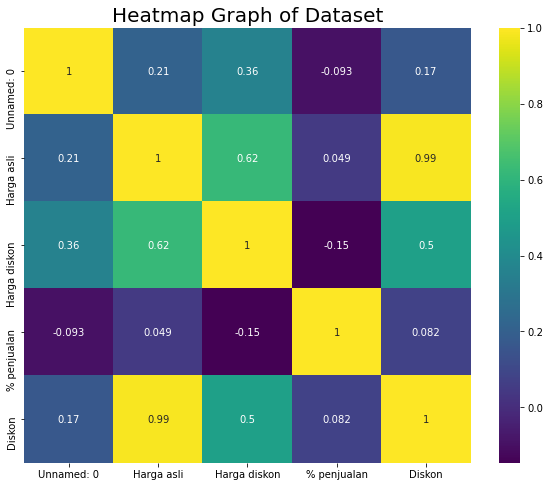

In [37]:
plt.figure(figsize=(10, 8))
sns.heatmap(dfs.corr(), cmap='viridis', annot=True)
plt.title('Heatmap Graph of Dataset', fontsize=20)

## 1. Mengetahui pengaruh diskon terhadap persentase penjualan produk per category

In [38]:
dfs['Diskon'].mode()

0    507.005
dtype: float64

<Figure size 864x216 with 0 Axes>

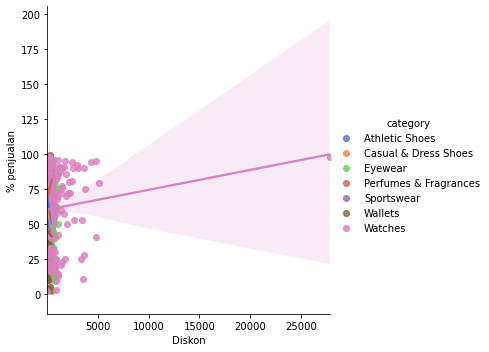

In [39]:
plt.figure(figsize=(12,3))
sns.lmplot(x="Diskon", y="% penjualan", data=dfs, hue='category', palette="muted")
plt.show()

### Insight 1

Kecenderungan pengaruh diskon terhadap persentase penjualan ialah positif, akan tetapi berdasarkan grafik terlihat bahwa pengaruhnya tidak terlalu kuat. Menurut website berikut https://smallbusiness.chron.com/advantages-offering-discounts-business-25765.html, diskon dapat menambah potensi terjualnya produk pada suatu toko. Akan tetapi tidak menjamin meningkatkan persentase penjualan secara signifikan

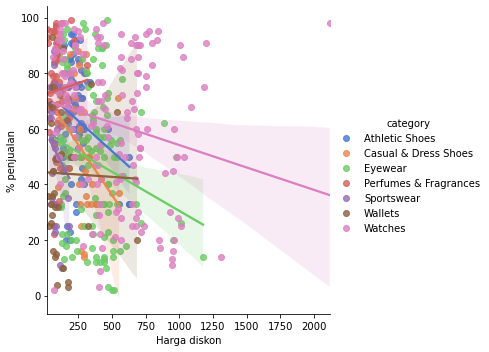

In [40]:
sns.lmplot(x="Harga diskon", y="% penjualan", data=dfs, hue='category', palette="muted")
plt.show()

### Insight 2

Diskon besar pengaruhnya terhadap harga jual. Kemudian, berdasarkan grafik, pengaruh harga produk per category setelah didiskon juga memiliki pengaruh yang tidak terlalu signifikan.

## 2. Meningkatkan persentase penjualan produk per category

In [41]:
a = dfs.groupby(['category'])['% penjualan'].mean()
a = pd.DataFrame(a)
a

,% penjualan
category,
Athletic Shoes,63.048780
Casual & Dress Shoes,52.028571
Eyewear,48.307692
Perfumes & Fragrances,73.793651
Sportswear,51.142857
Wallets,43.942857
Watches,61.865772


In [42]:
a['% penjualan'].mean()

56.304311587930606

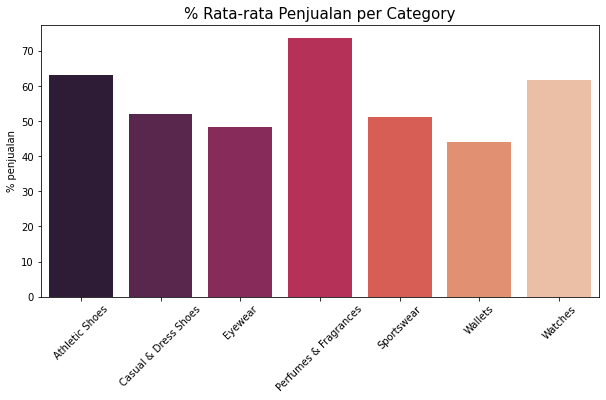

In [43]:
f, ax1 = plt.subplots(figsize=(10, 5), sharex=True)

x = dfs['category'].unique().tolist()
y1 = a[:]['% penjualan']
sns.barplot(x=x, y=y1, palette="rocket", ax=ax1)
ax1.set_ylabel("% penjualan")
ax1.set_title('% Rata-rata Penjualan per Category', size = 15)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
plt.show()

### Insight 3

Top 3 Category product dengan persentase rata-rata penjualan tertinggi

1. Parfume & Fragrances (73.79 %)
2. Athletic Shoes (63.05 %)
3. Watches (61.87 %)

### Insight 4

Daftar Category product dengan persentase di bawah rata-rata persentase penjualan (56.30 %)

1. Casual & Dress Shoes (52.03 %)
2. Sportswear (51.14 %)
3. Eyewear (48.31 %)
4. Wallets (43.94 %)

---------------------------------------------------------------------------------------------------------------------------------------

## Kesimpulan analisis

##### 1. Diskon dan Harga setelah diskon memiliki pengaruh yang kecil terhadap persentase penjualan. Oleh karena itu diperlukan sedikit peningkatan diskon produk atau penurunan sedikit harga diskon agar dapat meningkatkan persentase penjualan product

##### 2. Harus dilakukan peningkatan penjulan untuk kategory Casual & Dress Shoes, Sportwear, Eyewear, dan Wallets dengan cara membuat segmentasi dan memberikan promo bundling dengan category produk yang tinggi persentase penjualan nya.

- Wallets dengan Perfume & Fragrances
- Sportswear dengan Athtletic Shoes
- Watches dengan Casual dress Shoes dan Eyewear